
# Building a NN using numpy

A fully-connected ReLU network with one hidden layer and no biases, trained to
predict y from x using Euclidean error.

The model that we want to build has the following structure:
$$\hat{y}(x) = \text{relu}(x.w_1).w_2,$$
where $x$ and $y$ are the input and output features (of dimension 1000 and 10, respectively). Here the relu activation function is used and $w_1$ and $w_2$ are weight matrices.

This implementation uses numpy to manually compute the forward pass, loss, and
backward pass. A numpy array is a generic n-dimensional array; it does not know anything about
deep learning or gradients or computational graphs, and is just a way to perform
generic numeric computations.

This example is adapted from: https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

### Forward and backward pass

Forward pass: $x \rightarrow h= x.W_1 \rightarrow \hat{y} = \text{relu}(h).W_2.$

Cost and loss functions:
* Cost: $E(W) = \sum_{i=1}^N (\hat{y} - y)^2$
* $\text{loss}: \ell(\hat{y},W) = (\hat{y} - y)^2.$

Backward pass: derivatives of loss function

$$\frac{\partial \ell}{\partial W_2} = \frac{\partial \ell}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial W_2} = 2(\hat{y} - y).\text{relu}(h)$$

$$\frac{\partial \ell}{\partial W_1} = \frac{\partial \ell}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial h} \frac{\partial h}{\partial W_1} = 2(\hat{y} - y).W_2. \frac{\partial \text{relu}(h)}{\partial h} .x$$

### Initialisation

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

N = 64      # N: input batch size
D_in = 1000 # D_in: input dimension
H = 100     # H: hidden layer dimension;
D_out = 10  # D_out: output dimension

# Create random input and output (target) training data
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# Randomly initialize weights (no bias terms)
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6

### First let's at the dimension of data and weights. 
For this use e.g. print(x.shape)

In [2]:
print("x:",x.shape)
print("w1:",w1.shape)
print("w2:",w2.shape)
print("y:",y.shape)

x: (64, 1000)
w1: (1000, 100)
w2: (100, 10)
y: (64, 10)


### Forward pass: compute predicted y

We want to compute: $\hat{y} = \text{relu}(x.w_1).w_2$, where the relu activation function is used.

For this calculate (be careful of the matrix dimensions):
* h = dot product of x and w1 (use .dot() function)
* h_relu: $\text{relu}(h)$ relu activation function (using np.maximum() function)
* compute $\hat{y}$

In [3]:
h = x.dot(w1)                # dim (64,100)
h_relu = np.maximum(h, 0)    # dim (64,100)
y_pred = h_relu.dot(w2)      # dim (64,10)

### Calculate and print cost function
* Cost: $E(w_1,w_2) = \sum_{i=1}^N (\hat{y_i} - y_i)^2$
* $\text{loss}: \ell(\hat{y},W) = (\hat{y} - y)^2.$


In [4]:
cost = np.square(y_pred - y).sum()
print("total cost:", cost)    

total cost: 35651463.58583983


### Backward pass
Compute gradients of $w_1$ and $w_2$ with respect to loss.

Beware of matrices dimensions !

We have: dim(x) = (64, 1000); dim($w_1$) = (1000, 100); dim($w_2$) = (100, 10); dim(y) = (64, 10). Therefore:

\begin{align*}
\frac{\partial \ell}{\partial W_2} = [\text{relu}(h)]^T \cdot 2(\hat{y} - y) & \ \rightarrow \ \text{dim = } (100,64) \times (64,10) = (100,10) \\
\frac{\partial \ell}{\partial W_1} = x^T \cdot \left( \frac{\partial \text{relu}(h)}{\partial h} \cdot 2 (\hat{y} - y) \right) \cdot W_2^T & \ \rightarrow \ \text{dim = } (1000,64) \times (64,10) \times (10,100) = (1000,100) \\
\end{align*}


In [5]:
# Backprop to compute gradients of w1 and w2 with respect to loss
grad_y_pred = 2.0 * (y_pred - y)
grad_w2 = h_relu.T.dot(grad_y_pred)
grad_h_relu = grad_y_pred.dot(w2.T)
grad_h = grad_h_relu.copy()
grad_h[h < 0] = 0               # if h<0 then set grad_h=0
grad_w1 = x.T.dot(grad_h)

### Update weights $w_1$ and $w_2$
Note: because of matrices dimensionality the gradients are already summed over all N data events

In [6]:
# Update weights
w1 -= learning_rate * grad_w1
w2 -= learning_rate * grad_w2

### Repeat procedure 500 times

In [7]:
cost=[]
counter=[]

niteration = 500

for t in range(niteration):
    # Forward pass: compute predicted y
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    cost.append(loss)
    counter.append(t)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0                      # if h<0 then set grad_h=0
    grad_w1 = x.T.dot(grad_h)

    # Update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

### Plot model performance (optional)
Using matplotlib plot the evolution of cost as a function of the number of iterations

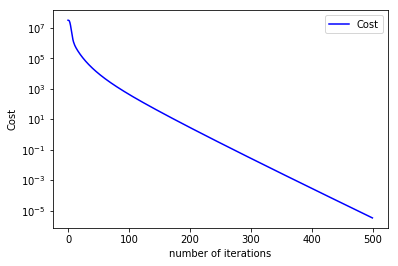

In [8]:
fig = plt.figure()
plt.plot(counter, cost, color='blue')
plt.legend(['Cost'], loc='upper right')
plt.xlabel('number of iterations')
plt.ylabel('Cost')
plt.yscale('log')